In [45]:
import importlib
import clusters
importlib.reload(clusters)
from clusters import *

TRANSPARENT = True
DPI = 200

if TRANSPARENT:
    white = 'white'
    rc = {
        'text.color': white,
        'axes.edgecolor': white,
        'axes.labelcolor': white,
        'xtick.color': white,
        'ytick.color': white,
        'legend.labelcolor': white,
        'legend.facecolor': 'black',
        'legend.edgecolor': white,
        'figure.facecolor': 'black',
        'axes.facecolor': 'black',
    }
else:
    rc = {}

,source_id,bp_rp,phot_g_mean_mag,bp_g,g_rp,phot_g_mean_flux
0,5318501987408551936,1.381412,16.326288,0.607067,0.774344,5556.883910
1,5318501918689059712,0.827928,13.318416,0.331872,0.496056,88711.555917
2,5318501884329334272,0.879195,13.852233,0.353294,0.525901,54256.649720
3,5318501849969589632,0.920446,14.369488,0.375167,0.545280,33693.897323
4,5318501781250125440,1.168430,16.150420,0.493393,0.675037,6533.995236
...,...,...,...,...,...,...
9557,5318088639755648128,1.106836,14.730533,0.471207,0.635630,24162.013560
9558,5321610238061906944,1.358960,16.516214,0.612320,0.746640,4665.096774
9559,5318405196029706880,1.505830,16.232584,0.686853,0.818976,6057.770245
9560,5318309293691148672,2.456892,17.934559,1.265511,1.191381,1263.347981


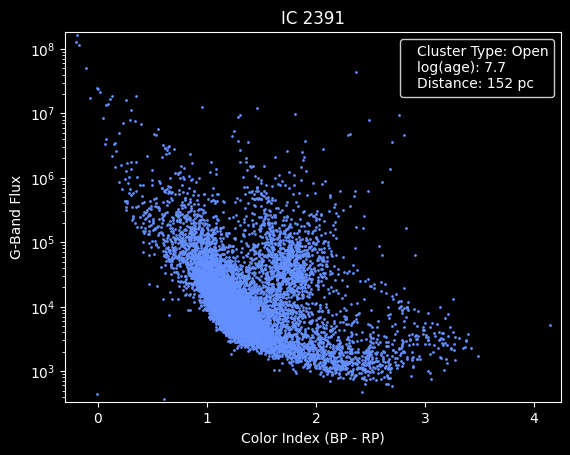

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

x_min = min(c.data["bp_rp"].min() for c in clusters) - 0.1
x_max = max(c.data["bp_rp"].max() for c in clusters) + 0.1

y_min = min(c.data["phot_g_mean_flux"].min() for c in clusters) * 0.9
y_max = max(c.data["phot_g_mean_flux"].max() for c in clusters) * 1.1

def lerp(t: float, a: float, b: float) -> float:
    return a + t * (b - a)

def graph(cluster: Cluster):
    with plt.rc_context(rc):
        df: pd.DataFrame = cluster.data
        fig, ax = plt.subplots()

        # log scale
        ax.set_yscale('log')
        ax.set_xlim([x_min, x_max])
        ax.set_ylim([y_min, y_max])
        ax.scatter(
            df["bp_rp"],
            df["phot_g_mean_flux"],
            s=1,
            label=cluster.get_info_label(),
            color=f"#{cluster.color:06X}"
        )

        ax.set_title(cluster.name)
        ax.set_xlabel("Color Index (BP - RP)")
        ax.set_ylabel("G-Band Flux")
        ax.legend(handlelength=0, handleheight=0, markerscale=0)

        fig.savefig(f"output/{cluster.name}.png", dpi=DPI, bbox_inches="tight", transparent=TRANSPARENT)

graph(clusters[0])
clusters[0].data

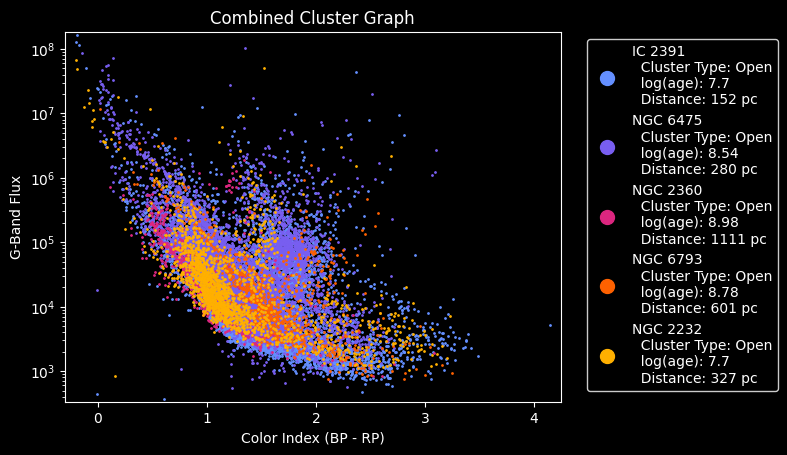

In [47]:
def combined_graph():
    fig, ax = plt.subplots()

    ax.set_yscale('log')
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])

    for cluster in clusters:
        df: pd.DataFrame = cluster.data
        ax.scatter(
            df["bp_rp"],
            df["phot_g_mean_flux"],
            s=1,
            label=cluster.name + "\n" + cluster.get_info_label("  "),
            color=f"#{cluster.color:06X}"
        )

    ax.set_title("Combined Cluster Graph")
    ax.set_xlabel("Color Index (BP - RP)")
    ax.set_ylabel("G-Band Flux")
    ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left", markerscale=10)

    fig.savefig("output/combined.png", dpi=DPI, bbox_inches="tight", transparent=TRANSPARENT)

with plt.rc_context(rc):
    combined_graph()

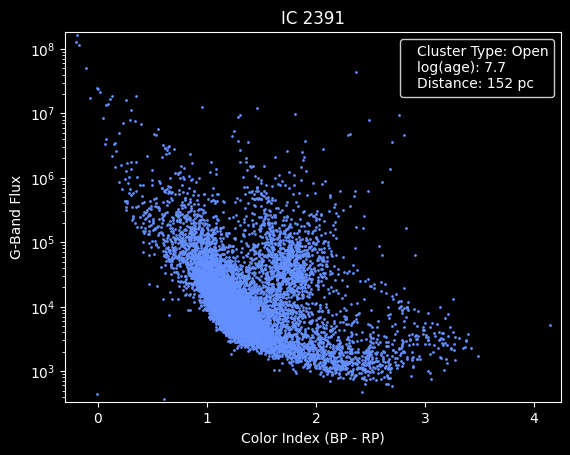

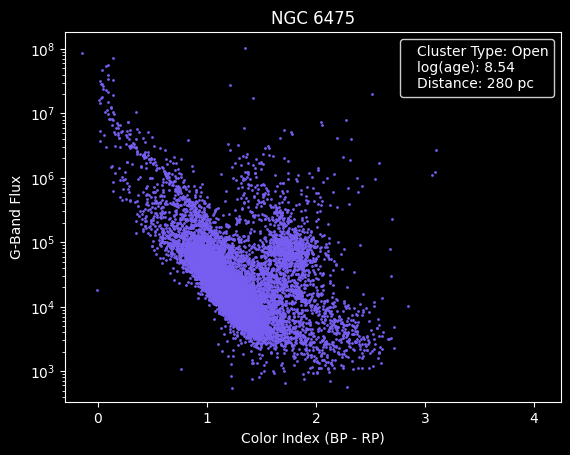

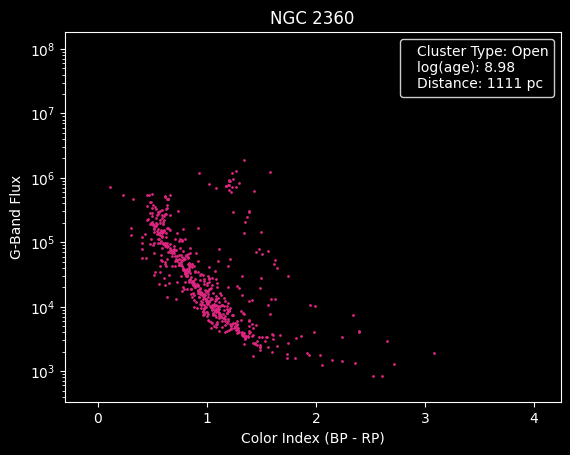

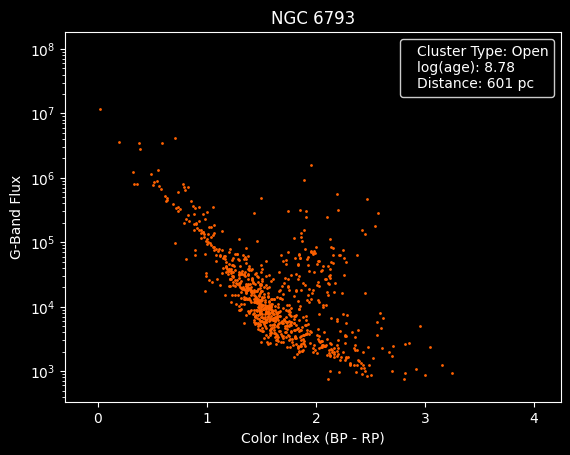

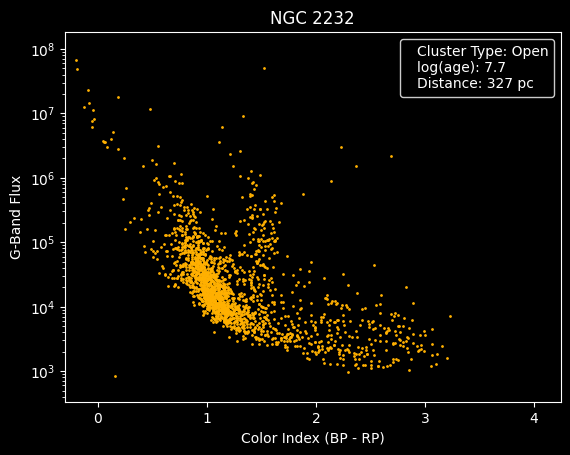

In [48]:
_ = list(map(graph, clusters))